In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\kandu\OneDrive\Desktop\stroke prediction.csv")
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0


In [3]:
df.drop(columns=['id'],inplace=True)

## Data understanding

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [5]:
df['bmi'].value_counts()

27.7    271
27.6    267
26.8    266
26.1    265
27.1    260
       ... 
59.1      1
64.0      1
56.1      1
56.9      1
89.0      1
Name: bmi, Length: 555, dtype: int64

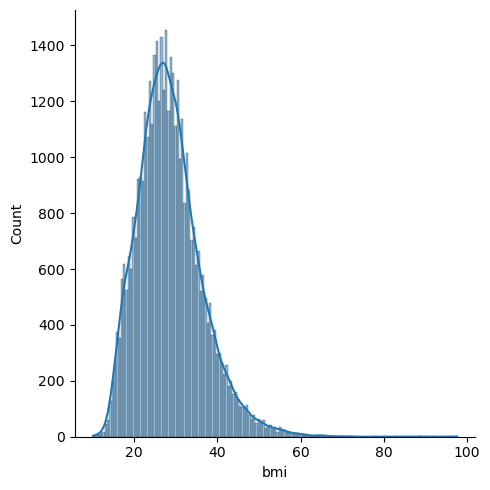

In [6]:
sns.displot(df['bmi'],kde=True)
plt.show()

In [7]:
df['bmi'].skew()

0.8987282500249906

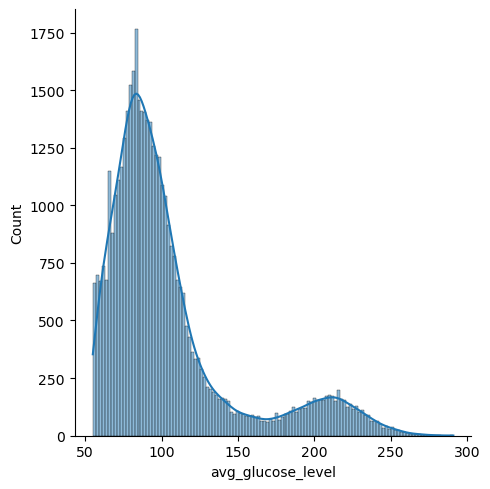

In [8]:
sns.displot(df['avg_glucose_level'],kde=True)
plt.show()

In [9]:
df['avg_glucose_level'].skew()

1.6754049014377763

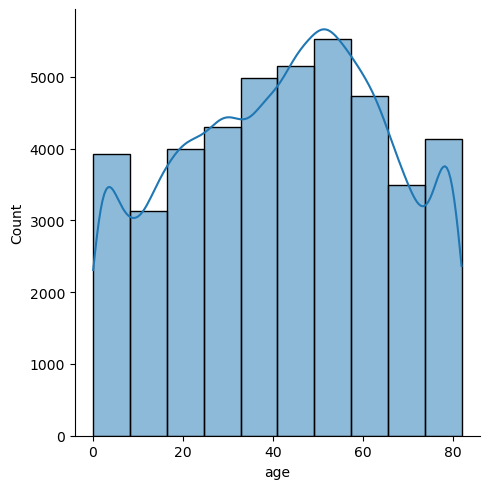

In [10]:
sns.displot(df['age'],bins=10,kde=True)
plt.show()

In [11]:
df['age'].skew()

-0.10249737146133675

## EDA

In [12]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

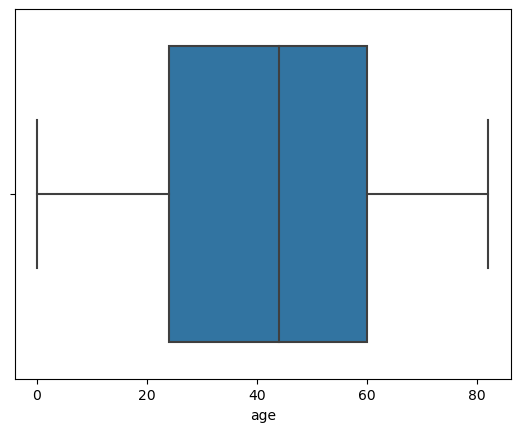

In [13]:
sns.boxplot(x=df['age'])
plt.show()

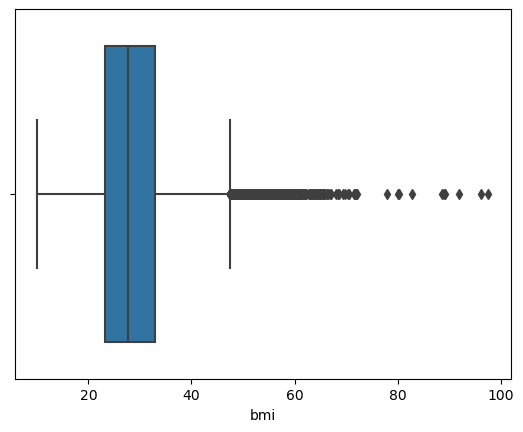

In [14]:
sns.boxplot(x=df['bmi'])
plt.show()

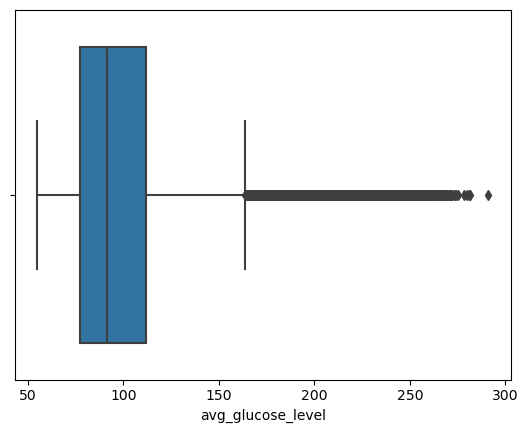

In [15]:
sns.boxplot(x=df['avg_glucose_level'])
plt.show()

In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## DATA CLEANING

In [17]:
df['bmi'].fillna(df['bmi'].median(),inplace=True)

In [18]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

In [19]:
### pip install  feature_engine

In [20]:
from feature_engine.outliers import Winsorizer 
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['bmi'])
df_win=win.fit_transform(df[['bmi']])

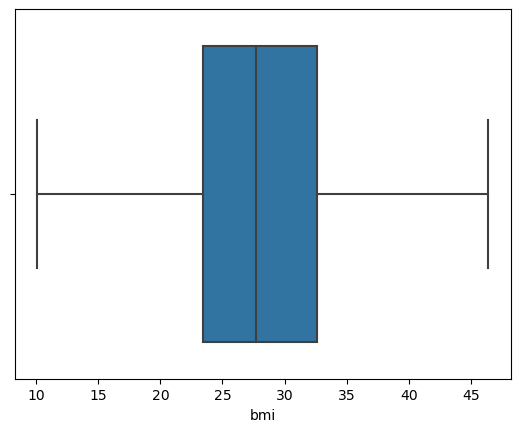

In [21]:
sns.boxplot(x=df_win['bmi'])
plt.show()

In [22]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['avg_glucose_level'])
df_win=win.fit_transform(df[['avg_glucose_level']])

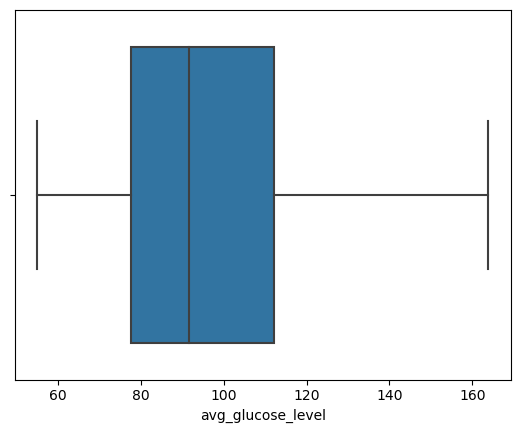

In [23]:
sns.boxplot(x=df_win['avg_glucose_level'])
plt.show()

## Data wrangling
### encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['smoking_status']=le.fit_transform(df['smoking_status'])
df['gender']=le.fit_transform(df['gender'])
df['ever_married']=le.fit_transform(df['ever_married'])
df['work_type']=le.fit_transform(df['work_type'])
df['Residence_type']=le.fit_transform(df['Residence_type'])
df.tail(60)
df[df['stroke']==1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
63,1,67.0,0,1,1,2,1,228.69,36.6,0,1
81,0,61.0,0,0,1,3,0,202.21,27.7,1,1
141,1,80.0,0,1,1,2,0,105.92,32.5,1,1
257,0,49.0,0,0,1,2,1,171.23,34.4,2,1
264,0,79.0,1,0,1,3,0,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
43148,0,56.0,0,0,1,2,0,83.27,32.9,2,1
43268,1,69.0,0,0,1,3,0,97.36,28.0,3,1
43304,0,80.0,0,0,1,3,1,75.91,26.7,1,1
43318,1,62.0,1,1,1,2,0,77.97,31.5,0,1


In [25]:
df['avg_glucose_level']=(1/df['avg_glucose_level']+0.01)

In [26]:
df['avg_glucose_level'].skew()

-0.13361684361986342

In [27]:
corr_ma=df.corr()

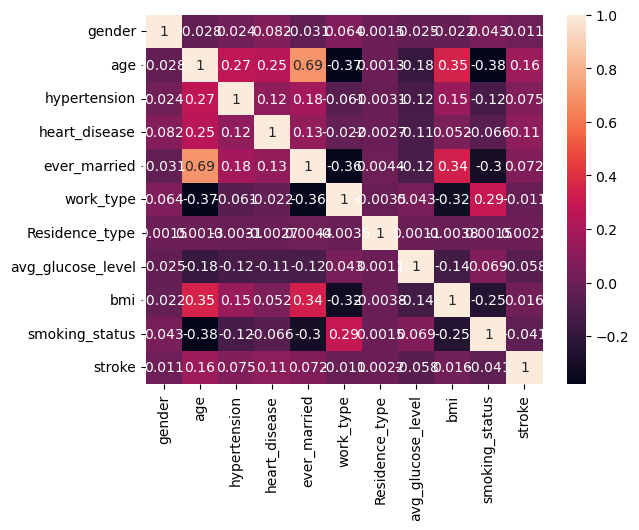

In [28]:
sns.heatmap(corr_ma,annot=True)
plt.show()

## LogisticRegression model1

In [29]:
x=df.drop(columns='stroke')
y=df['stroke']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [36]:
from sklearn.linear_model import LogisticRegression 
log_model=LogisticRegression()
log_model.fit(x_train,y_train)


LogisticRegression()

In [33]:
ypred_train=log_model.predict(x_train)
ypred_test=log_model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,ypred_train)

0.9813364055299539

In [35]:
accuracy_score(y_test,ypred_test)

0.9834101382488479

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred_test)

array([[12804,     0],
       [  216,     0]], dtype=int64)

C:\Users\kandu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


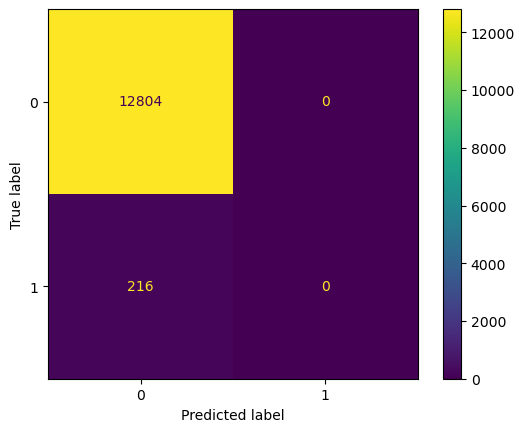

In [37]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_model,x_test,y_test)


In [38]:
## cross validation 
from sklearn.model_selection import cross_val_score
score=cross_val_score(log_model,x,y,cv=5)
print(score)
score.mean()

C:\Users\kandu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kandu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[0.98202765 0.98202765 0.98191244 0.98191244 0.98191244]


C:\Users\kandu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9819585253456221

In [39]:
## classification report 
from sklearn.metrics import classification_report 
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12804
           1       0.00      0.00      0.00       216

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.98     13020



C:\Users\kandu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kandu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kandu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
## auc

C:\Users\kandu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


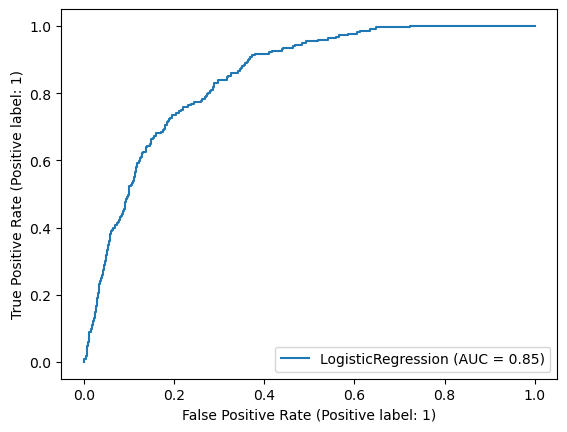

In [41]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(log_model,x_test,y_test)
plt.show()

### 

### Decision Tree midel2

In [42]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
base_pred=model1.predict(x_test)
pred_train=model1.predict(x_train)

In [35]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [45]:
accuracy_score(y_train,pred_train)

1.0

In [46]:
accuracy_score(y_test,base_pred)

0.961136712749616

C:\Users\kandu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


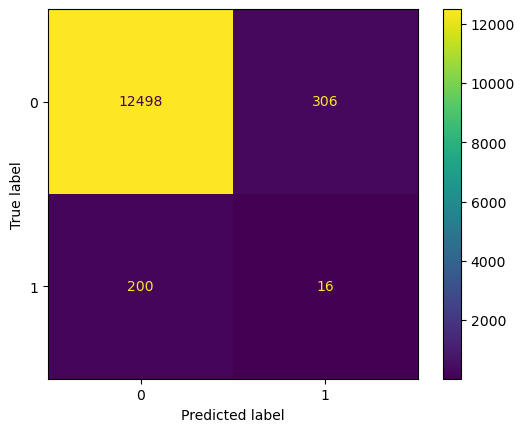

In [47]:
plot_confusion_matrix(model1,x_test,y_test)


In [48]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12804
           1       0.05      0.07      0.06       216

    accuracy                           0.96     13020
   macro avg       0.52      0.53      0.52     13020
weighted avg       0.97      0.96      0.96     13020



In [49]:
model1.feature_importances_

array([0.03411087, 0.14472719, 0.03242573, 0.01166794, 0.01524536,
       0.03439116, 0.03621469, 0.40424726, 0.2322032 , 0.0547666 ])

In [50]:
pd.DataFrame(index=x.columns,data=model1.feature_importances_,columns=['Featureimportance'])

,Featureimportance
gender,0.034111
age,0.144727
hypertension,0.032426
heart_disease,0.011668
ever_married,0.015245
work_type,0.034391
Residence_type,0.036215
avg_glucose_level,0.404247
bmi,0.232203
smoking_status,0.054767


In [51]:
from sklearn.tree import plot_tree

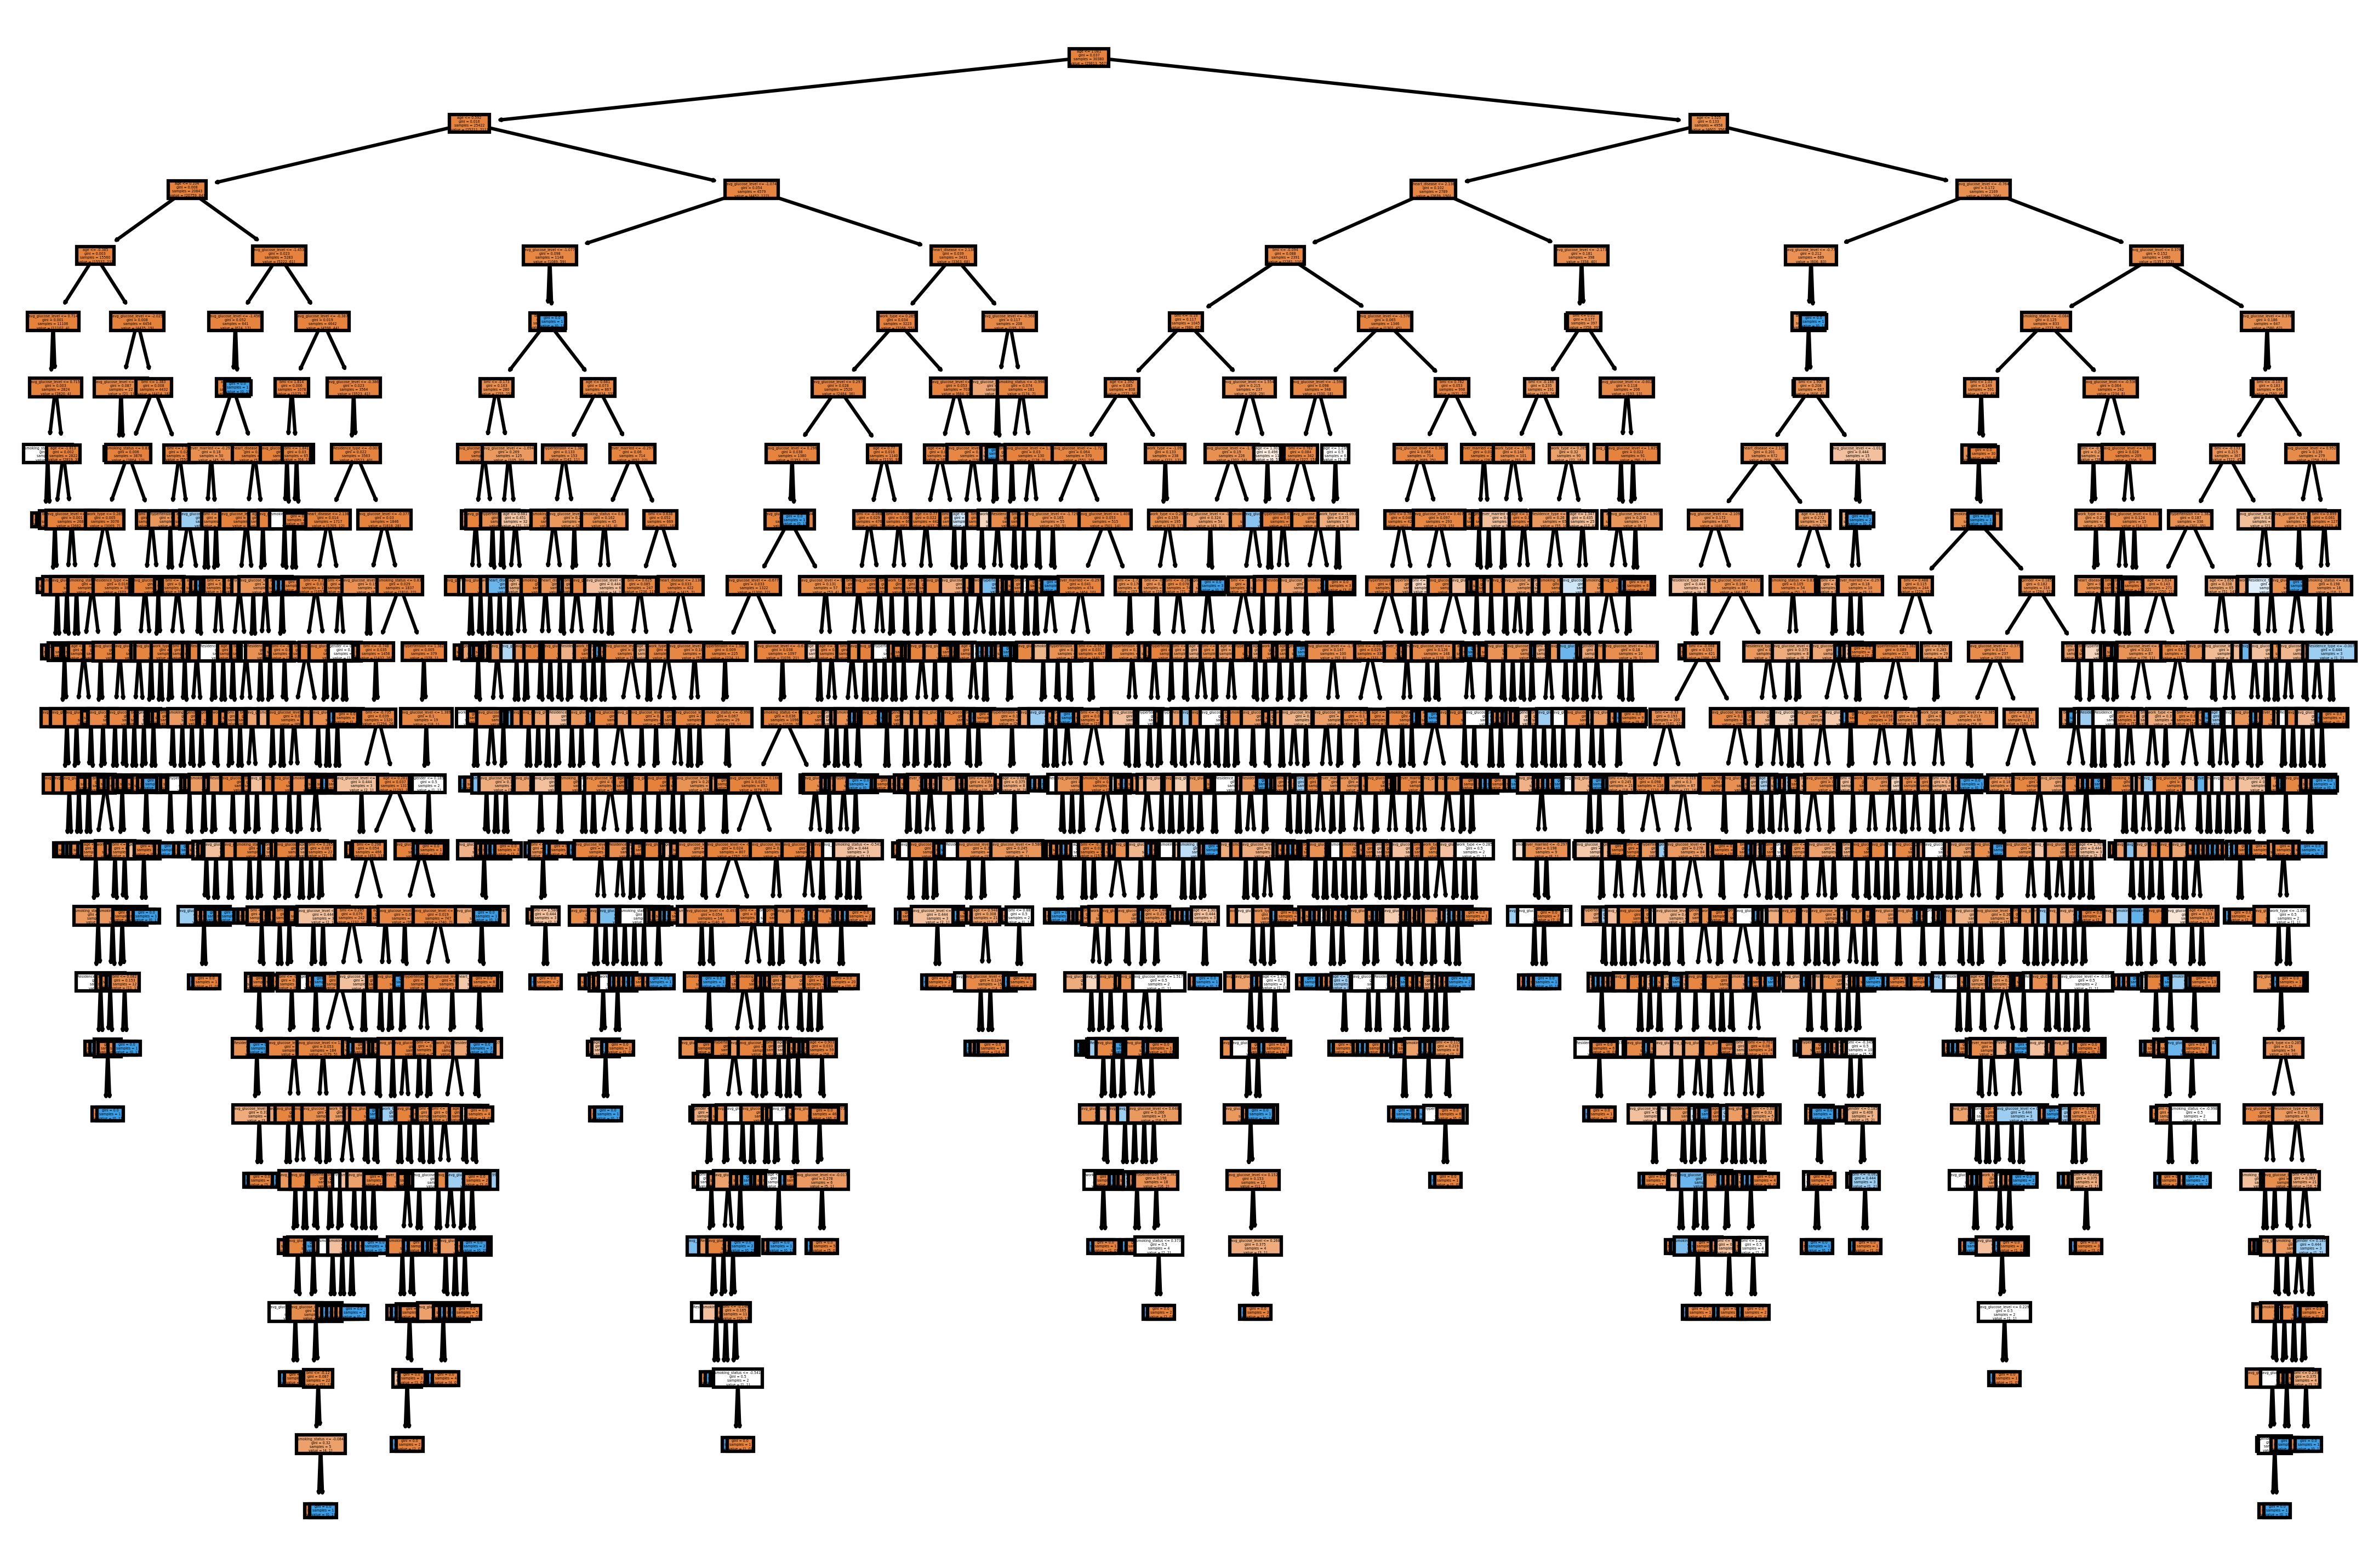

In [52]:
plt.figure(figsize=(12,8),dpi=450)
plot_tree(model1,filled=True,feature_names=x.columns)
plt.show()

In [56]:
purned_tree=DecisionTreeClassifier(max_depth=3)

In [61]:
def report_model(model1):
    model1.fit(x_train,y_train)
    model_preds=model1.predict(x_test)
    pres_train=model1.predict(x_train)
    print("train accuracy",accuracy_score(y_train,pred_train))
    print("test accuracy",accuracy_score(y_test,model_preds))
    plt.figure(figsize=(12,8),dpi=350)
    plot_tree(model1,filled=True,feature_names=x.columns)

train accuracy 1.0
test accuracy 0.9834101382488479


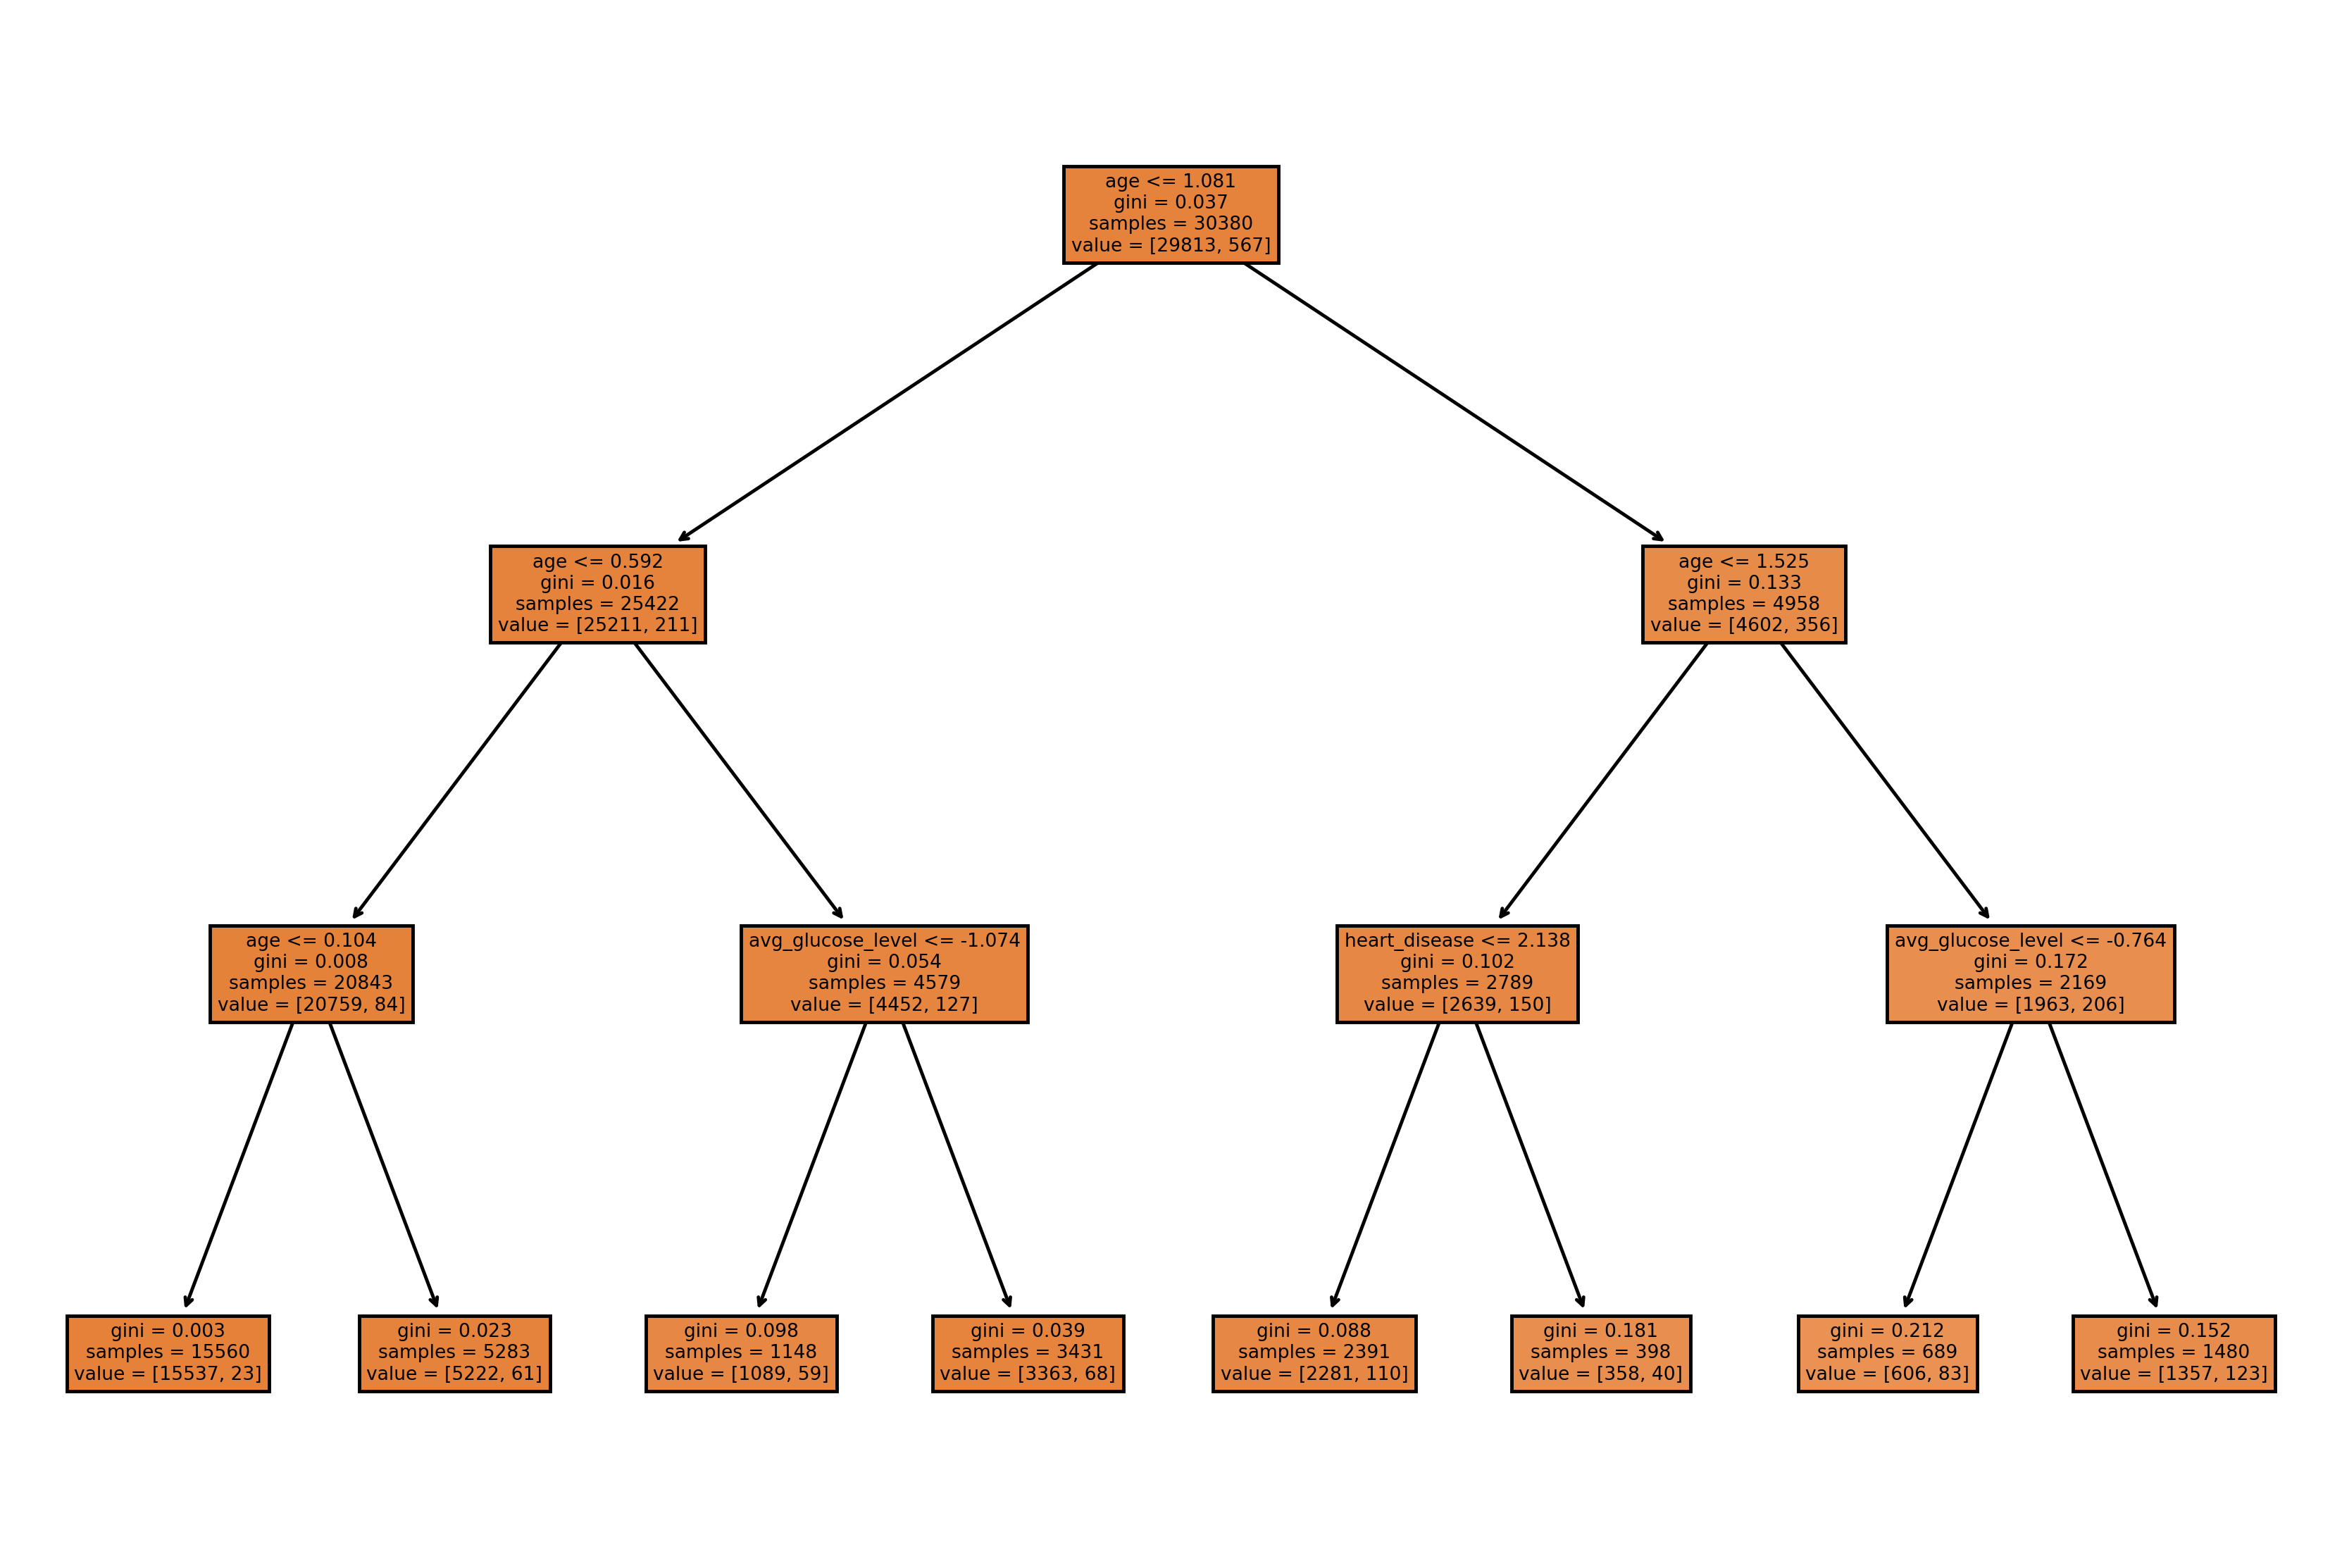

In [62]:
report_model(purned_tree)


In [63]:
pruned_tree=DecisionTreeClassifier(max_leaf_nodes=3)

train accuracy 1.0
test accuracy 0.9834101382488479


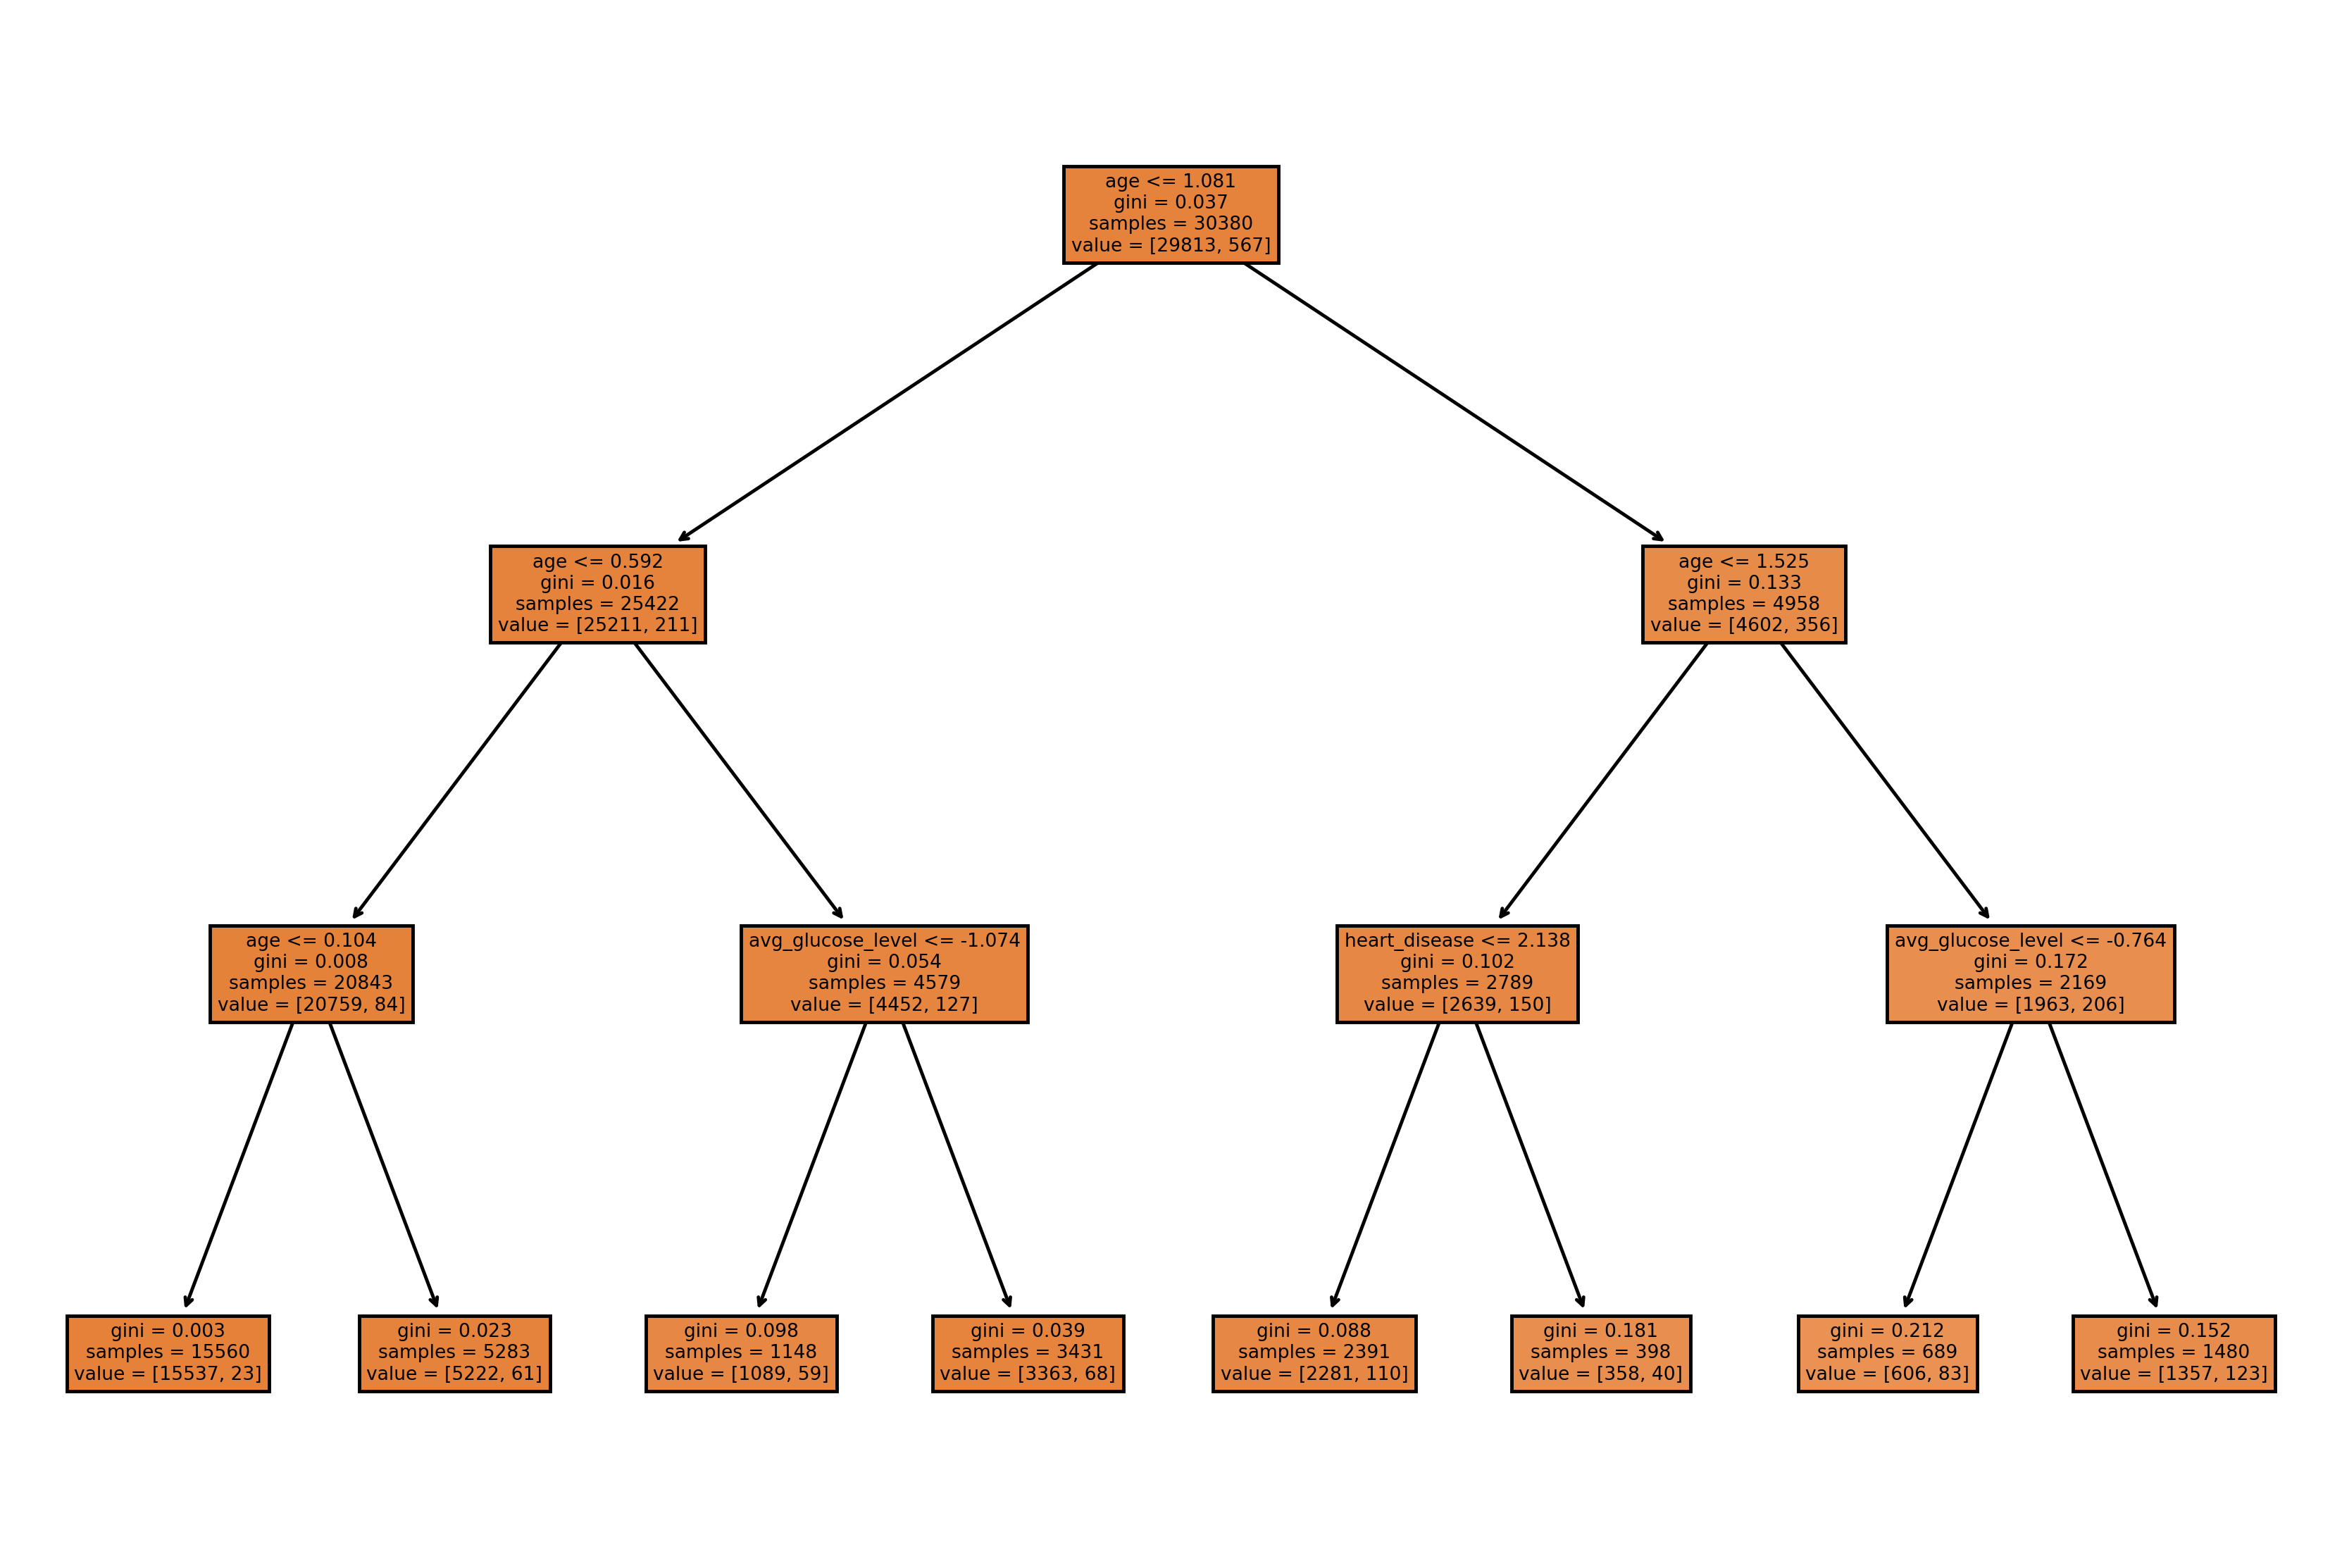

In [65]:
report_model(purned_tree)


### Random Forest model3

In [31]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [32]:
ypred_train=model2.predict(x_train)
ypred_test=model2.predict(x_test)

### Evaluation

In [33]:
from sklearn.metrics import accuracy_score
print("Train accuracy:",accuracy_score(ypred_train,y_train))
print("Test accuracy:",accuracy_score(ypred_test,y_test))

Train accuracy: 0.9999670836076366
Test accuracy: 0.9831797235023041


C:\Users\kandu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


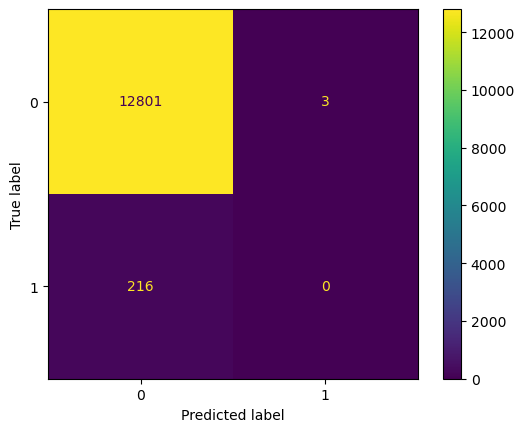

In [36]:
plot_confusion_matrix(model2,x_test,y_test)

In [37]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model2,x,y,cv=5)
print(scores)

[0.98179724 0.98202765 0.98191244 0.98191244 0.98179724]


In [38]:
model2.feature_importances_

array([0.0307818 , 0.18067982, 0.02072274, 0.01683637, 0.0127867 ,
       0.04475131, 0.03272271, 0.34311405, 0.25657747, 0.06102703])

In [39]:
pd.DataFrame(index=x.columns,data=model2.feature_importances_,columns=['Feature Importances'])

,Feature Importances
gender,0.030782
age,0.180680
hypertension,0.020723
heart_disease,0.016836
ever_married,0.012787
work_type,0.044751
Residence_type,0.032723
avg_glucose_level,0.343114
bmi,0.256577
smoking_status,0.061027


### Hyperparameter Tunning

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
estimator=RandomForestClassifier()
param_grid={'n_estimators':list(range(1,101))}

In [87]:
grid=GridSearchCV(estimator,param_grid,scoring="accuracy",cv=5)

In [ ]:
grid.fit(x_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
forest_model = RandomForestClassifier(n_estimators=54, max_depth=5, random_state=0)
forest_model.fit(x_train,y_train)



In [ ]:
ypred_train1=model2.predict(x_train)
ypred_test1=model2.predict(x_test)

In [ ]:
print("Train accuracy:",accuracy_score(ypred_train1,y_train))
print("Test accuracy:",accuracy_score(ypred_test1,y_test))

### KNN model 3

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

### Prediction

In [82]:
y_pred_train=knn_model.predict(x_train)
y_pred_test=knn_model.predict(x_test)

C:\Users\kandu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kandu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Evaluation

In [83]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9813693219223173
0.9829493087557604


In [84]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(knn_model,x,y,cv=5)
print(score)
score.mean()

C:\Users\kandu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kandu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.98099078 0.98145161 0.98156682 0.98168203 0.98156682]


0.9814516129032258

### choosing best  k value
### Hyperparameter tuning for knn classifier

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,31)),'p':[1,2]}
full_cv_classifier=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')

In [87]:
full_cv_classifier.fit(x_train,y_train)

In [89]:
full_cv_classifier.best_params_

In [90]:
knn_model=KNeighborsClassifier(n_neighbors=6,p=2)
knn_model.fit(x_train,y_train)

y_pred_train=knn_model.predict(x_train)
y_pred_test=knn_model.predict(x_test)

print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))



C:\Users\kandu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kandu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.9813034891375905
0.9833333333333333


In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_test)

array([[12803,     1],
       [  216,     0]], dtype=int64)

In [93]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12804
           1       0.00      0.00      0.00       216

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.98     13020



### AdaBoostClassifier Model4

In [94]:
from sklearn.ensemble import AdaBoostClassifier
model3= AdaBoostClassifier(random_state=101)
model3.fit(x_train,y_train)

AdaBoostClassifier(random_state=101)

In [96]:
ypred_train=model3.predict(x_train)
predictions=model3.predict(x_test)

### Evaluation 
#### Accuracy

In [97]:
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,predictions))
     

train accuracy: 0.9813034891375905
test accuracy: 0.9832565284178187


C:\Users\kandu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


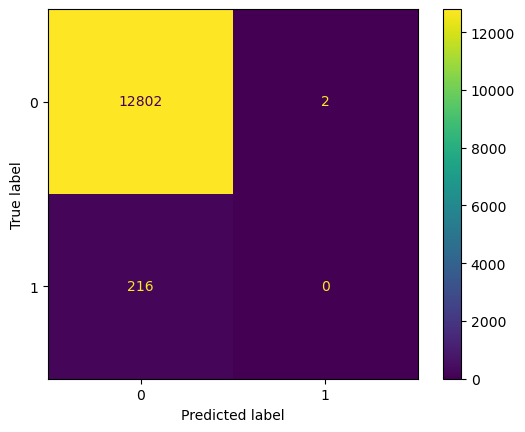

In [99]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model3,x_test,y_test)
plt.show()

### classification Report

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12804
           1       0.00      0.00      0.00       216

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.98     13020



### cross vallidation score


In [103]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model3,x,y,cv=5)
print("cross validatrion score:",score.mean())

cross validatrion score: 0.981889400921659


#### Hyperparameter Tuning

In [104]:
from sklearn.model_selection import GridSearchCV
estimator=AdaBoostClassifier()
param_grid={"n_estimators":list(range(1,101))}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'n_estimators': 1}

### Final Model

In [106]:
final_model=AdaBoostClassifier(n_estimators=20)
final_model.fit(x_train,y_train)
preds_train=final_model.predict(x_train)
preds_test=final_model.predict(x_test)

print("train accuracy score:",accuracy_score(y_train,preds_train))
print("test accuracy score:",accuracy_score(y_test,preds_test))

train accuracy score: 0.9813364055299539
test accuracy score: 0.9834101382488479


In [107]:
final_model.feature_importances_

array([0.  , 0.5 , 0.  , 0.05, 0.  , 0.  , 0.  , 0.2 , 0.25, 0.  ])

### Important features

In [108]:
feats=pd.DataFrame(index=x.columns,data=final_model.feature_importances_,columns=['Importance'])
feats

,Importance
gender,0.00
age,0.50
hypertension,0.00
heart_disease,0.05
ever_married,0.00
work_type,0.00
Residence_type,0.00
avg_glucose_level,0.20
bmi,0.25
smoking_status,0.00


In [109]:
imp_feats=feats[feats['Importance']>0]
imp_feats.sort_values("Importance")

,Importance
heart_disease,0.05
avg_glucose_level,0.20
bmi,0.25
age,0.50


### GradientBoostingClassifier model5

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
model4=  GradientBoostingClassifier()
model4.fit(x_train,y_train)

GradientBoostingClassifier()

In [117]:
ypred_train=model4.predict(x_train)
predictions=model4.predict(x_test)

In [118]:
from sklearn.metrics import accuracy_score
print("train accuracy:",accuracy_score(y_train,ypred_train))
print("test accuracy:",accuracy_score(y_test,predictions))
      

train accuracy: 0.9818959842001317
test accuracy: 0.9823348694316436


### HyperPareameter Tunning

In [113]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingClassifier()
param_grid={"n_estimators":[1,5,10,20,40,100],"learning_rate":[0.1,0.2,0.3,0.5,0.8,1]}
grid=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 1}

In [115]:
final_model=GradientBoostingClassifier(n_estimators=1,learning_rate=0.1)
final_model.fit(x_train,y_train)
preds_train=final_model.predict(x_train)
preds_test=final_model.predict(x_test)

print("train accuracy score:",accuracy_score(y_train,preds_train))
print("test accuracy score:",accuracy_score(y_test,preds_test))

train accuracy score: 0.9813364055299539
test accuracy score: 0.9834101382488479


In [119]:
final_model.feature_importances_

array([0.        , 0.89399256, 0.        , 0.04251001, 0.        ,
       0.        , 0.        , 0.06349743, 0.        , 0.        ])

### Important features 

In [120]:
imp_feats=pd.DataFrame(index=x.columns,data=final_model.feature_importances_,columns=['Importance'])
feats

,Importance
gender,0.00
age,0.50
hypertension,0.00
heart_disease,0.05
ever_married,0.00
work_type,0.00
Residence_type,0.00
avg_glucose_level,0.20
bmi,0.25
smoking_status,0.00


In [122]:
imp_feats=imp_feats[imp_feats['Importance']>0.01]
imp_feats

,Importance
age,0.893993
heart_disease,0.042510
avg_glucose_level,0.063497


###  xgboost model6

In [124]:
!pip install xgboost

  Using cached xgboost-1.6.2-py3-none-win_amd64.whl (125.4 MB)


In [37]:
from xgboost import XGBClassifier

In [38]:

xgb_model= XGBClassifier()

In [39]:

xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:

y_pred_train=xgb_model.predict(x_train)
y_pred_test=xgb_model.predict(x_test)

In [41]:
from xgboost import XGBClassifier
xgb_model= XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred_train=xgb_model.predict(x_train)
y_pred_test=xgb_model.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,y_pred_train))
print(accuracy_score(y_test,y_pred_test))

0.9849242922975642
0.9831029185867896


In [42]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=xgb_model,X=x_train, y=y_train,cv=5)
accuracies.mean()# In this cross_val_score x should be capital

0.9807109940750495

C:\Users\kandu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


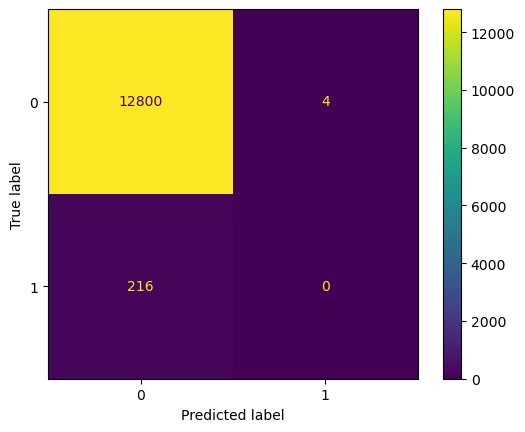

In [43]:
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(xgb_model,x_test,y_test))


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12804
           1       0.00      0.00      0.00       216

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.98     13020



In [133]:
from sklearn.model_selection import GridSearchCV
xgb_model=XGBClassifier()
param_grid={"n_estimators":[1,2,10,20,40,100],'max_depth':[3,4,5,6],'gamma':[0,1,2,3]}

In [134]:
grid=GridSearchCV(xgb_model,param_grid,cv=5,scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
      

In [135]:
grid.best_params_

{'gamma': 0, 'max_depth': 3, 'n_estimators': 1}

In [45]:
final_model=XGBClassifier(gamma= 0, max_depth= 3, n_estimators= 1)
final_model.fit(x_train,y_train)
preds_train=final_model.predict(x_train)
preds_test=final_model.predict(x_test)

print("train accuracy score:",accuracy_score(y_train,preds_train))
print("test accuracy score:",accuracy_score(y_test,preds_test))

train accuracy score: 0.9813364055299539
test accuracy score: 0.9834101382488479


In [47]:
from joblib import dump


In [48]:
dump(final_model,'stroke_pre.joblib')

['stroke_pre.joblib']

In [49]:

from joblib import load

In [51]:

loaded_model=load('stroke_pre.joblib')


In [71]:

loaded_model.predict([[1,67.0,0,1,1,2,1,0.014373,36.6,0]])


array([0])

## ALL Scores Comparison

### Logistic Regression 
Train accuracy:1.0

Test accuracy:0.961136712749616
    
### KNN 
Train accuracy: 0.9813693219223173

Test accuracy: 0.9829493087557604
#### after tunning
Train accuracy: 0.9813034891375905

Test accuracy:0.9833333333333333
    
    
    
### decision tree(befor tunning)
train accuracy 1.0
test accuracy=.961136712749616
#### after tunning
train accuracy 1.0

test accuracy 0.9834101382488479


### Random forest(befor tunning)
Train accuracy: 1.0

Test accuracy: 0.9831029185867896 
#### after tunning
Train accuracy: 1.0,

Test accuracy: 0.9831029185867896 
    

    
### Adaboost(befor tunning)
train accuracy: 0.9813034891375905

test accuracy: 0.9832565284178187  
#### after tunning
train accuracy score: 0.9813364055299539

test accuracy score: 0.9834101382488479  
    
### Gradiantboost
train accuracy: 0.9818959842001317

test accuracy: 0.9823348694316436  
#### after tunning
train accuracy score: 0.9813364055299539

test accuracy score: 0.9834101382488479 
    
### Xgboost
train accuracy score:0.9849242922975642

test accuracy score:0.9831029185867896  
#### after tunning
train accuracy score: 0.9813364055299539

test accuracy score: 0.9834101382488479  

